# Imports

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.options.mode.chained_assignment = None  # default='warn'

import seaborn as sns

# Loading

In [2]:
TRAIN_DIR = r'train'
TEST_DIR  = r'test'

In [3]:
from loading_data import load_data

TRAIN_MOVIE_DIRECTOR_FILE = 'movie-director.csv'
TRAIN_MOVIE_REVENUE_FILE  = 'movies-revenue-classification.csv'
TRAIN_MOVIE_ACTOR_FILE    = 'movie-voice-actors.csv'

TEST_MOVIE_DIRECTOR_FILE = 'movie-director-test-samples.csv'
TEST_MOVIE_REVENUE_FILE  = 'movies-revenue-test-samples.csv'
TEST_MOVIE_ACTOR_FILE    = 'movie-voice-actors-test-samples.csv'


TRAIN_MOVIE_DIRECTOR_FILE = os.path.join(TRAIN_DIR, TRAIN_MOVIE_DIRECTOR_FILE)
TRAIN_MOVIE_REVENUE_FILE  = os.path.join(TRAIN_DIR, TRAIN_MOVIE_REVENUE_FILE)
TRAIN_MOVIE_ACTOR_FILE    = os.path.join(TRAIN_DIR, TRAIN_MOVIE_ACTOR_FILE)

TEST_MOVIE_DIRECTOR_FILE  = os.path.join(TEST_DIR, TEST_MOVIE_DIRECTOR_FILE)
TEST_MOVIE_REVENUE_FILE   = os.path.join(TEST_DIR, TEST_MOVIE_REVENUE_FILE)
TEST_MOVIE_ACTOR_FILE     = os.path.join(TEST_DIR, TEST_MOVIE_ACTOR_FILE)

train_data = load_data(director_file=TRAIN_MOVIE_DIRECTOR_FILE,
                       actor_file=TRAIN_MOVIE_ACTOR_FILE,
                       revenue_file=TRAIN_MOVIE_REVENUE_FILE)

test_data = load_data(director_file=TEST_MOVIE_DIRECTOR_FILE,
                      actor_file=TEST_MOVIE_ACTOR_FILE,
                      revenue_file=TEST_MOVIE_REVENUE_FILE)

# Preprocessing
* Handling `Genre` with Mode and OneHotEncoder
* Handling `MPAA` with mode
* Handling `Date` with Linear Regression
* Handling `Director` with dropping its column
* Handling `Title` & `Character` with label encoding
* Handling `MoviesSuccessLevel` with linear regression

In [4]:
from preprocessing import Preprocessor

## Train Data

<AxesSubplot:>

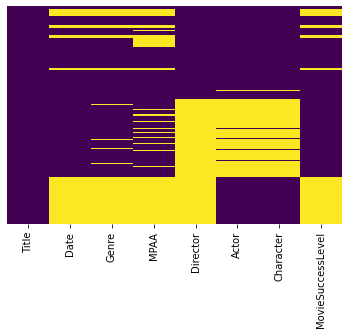

In [5]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
train_data.head()

,Title,Date,Genre,MPAA,Director,Actor,Character,MovieSuccessLevel
0,Snow White and the Seven Dwarfs,21-Dec-37,Musical,G,David Hand,Scotty Mattraw,Bashful,S
1,Snow White and the Seven Dwarfs,21-Dec-37,Musical,G,David Hand,Roy Atwell,Doc,S
2,Snow White and the Seven Dwarfs,21-Dec-37,Musical,G,David Hand,Eddie Collins,Dopey,S
3,Snow White and the Seven Dwarfs,21-Dec-37,Musical,G,David Hand,Pinto Colvig,Grumpy,S
4,Snow White and the Seven Dwarfs,21-Dec-37,Musical,G,David Hand,Otis Harlan,Happy,S


In [7]:
pp = Preprocessor()
train_data = pp.preprocess(train_data)

<AxesSubplot:>

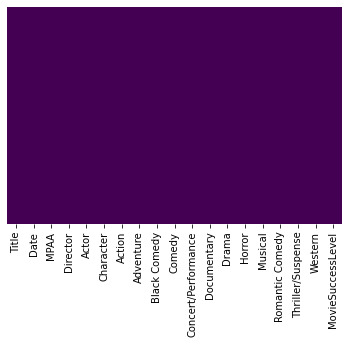

In [8]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
train_data.head()

,Title,Date,MPAA,Director,Actor,Character,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western,MovieSuccessLevel
0,351,2144966400.0,0,0,493,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
1,351,2144966400.0,0,0,477,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
2,351,2144966400.0,0,0,151,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
3,351,2144966400.0,0,0,436,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
4,351,2144966400.0,0,0,404,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4


## Test Data

<AxesSubplot:>

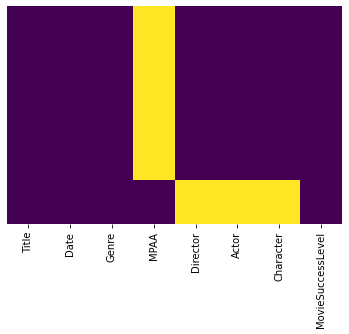

In [10]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
test_data.head()

,Title,Date,Genre,MPAA,Director,Actor,Character,MovieSuccessLevel
0,101 Dalmatians,27-Nov-96,Comedy,NaN,Wolfgang Reitherman,Lisa Davis,Anita Radcliffe,A
1,101 Dalmatians,27-Nov-96,Comedy,NaN,Wolfgang Reitherman,Betty Lou Gerson,Cruella de Vil,A
2,101 Dalmatians,27-Nov-96,Comedy,NaN,Wolfgang Reitherman,Frederick Worlock; J. Pat O'Malley,Horace & Jasper,A
3,101 Dalmatians,27-Nov-96,Comedy,NaN,Wolfgang Reitherman,Cate Bauer,Perdita,A
4,101 Dalmatians,27-Nov-96,Comedy,NaN,Wolfgang Reitherman,Rod Taylor,Pongo,A


In [12]:
pp = Preprocessor(dataset_type='test')
test_data = pp.preprocess(test_data, train_data)

<AxesSubplot:>

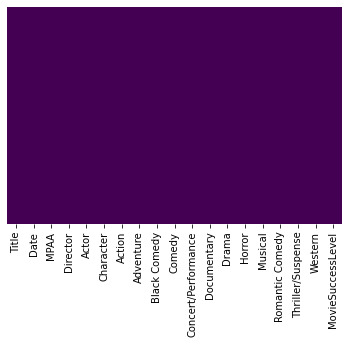

In [13]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
test_data.head()

,Title,Date,MPAA,Director,Actor,Character,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western,MovieSuccessLevel
0,0,849052800.0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0
1,0,849052800.0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0
2,0,849052800.0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0
3,0,849052800.0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0
4,0,849052800.0,0,0,0,0,0,0,0,1.0,0,0,0.0,0,0,0,0,0,0


## Decision Tree

In [15]:
from classifiers import DecisionTreeModel

In [16]:
dt = DecisionTreeModel(train_data)
dt.train()
dt.predict(test_data)
f"Accuracy: {dt.test_accuracy()}"

'Accuracy: 0.1'

<AxesSubplot:>

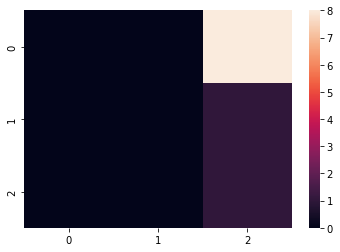

In [17]:
sns.heatmap(dt.conf_matrix())

## SVM

In [18]:
from classifiers import SVMModel

In [19]:
svm = SVMModel(train_data)
svm.train()
svm.predict(test_data)
f"Accuracy: {svm.test_accuracy()}"

'Accuracy: 0.8'

<AxesSubplot:>

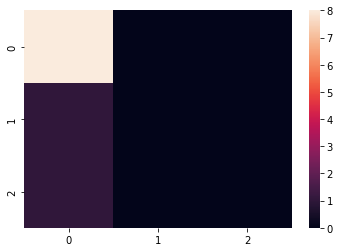

In [20]:
sns.heatmap(svm.conf_matrix())

## Logistic Regression

In [21]:
from classifiers import LogisticRegressionModel

In [22]:
lr = LogisticRegressionModel(train_data)
lr.train()
lr.predict(test_data)
f"Accuracy: {lr.test_accuracy()}"

'Accuracy: 0.8'

<AxesSubplot:>

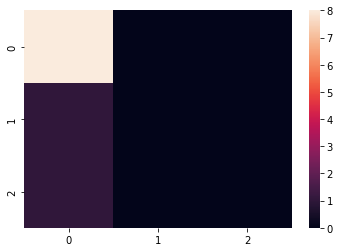

In [23]:
sns.heatmap(lr.conf_matrix())

# Polynomial Regression

In [24]:
from classifiers import PolyRegModel

In [25]:
pr = PolyRegModel(train_data)
pr.train()
pr.predict(test_data)
f"Accuracy: {pr.test_accuracy()}"

'Accuracy: 1.0'